In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import SimpleITK as sitk

In [ ]:
EE1 = np.ones((3,3)).astype(np.uint8)

EE2 = np.zeros((3,3)).astype(np.uint8)
EE2[:,:] = 1
EE2[0,0] = 0
EE2[0,2] = 0
EE2[2,0] = 0
EE2[2,2] = 0

EE3 = np.copy(EE2)
EE3[1,0] = 0

EE4 = np.copy(EE3)
EE4[2,1] = 0

EE5 = np.copy(EE3)
EE5[0,2] = 1
EE5[2,2] = 1

EE6 = np.copy(EE5)
EE6[:,1] = 0

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(10,10)) 
ax[0].imshow(EE1,cmap='gray')
ax[1].imshow(EE2,cmap='gray')
ax[2].imshow(EE3,cmap='gray')
ax[3].imshow(EE4,cmap='gray')
ax[4].imshow(EE5,cmap='gray')
ax[5].imshow(EE6,cmap='gray')

plt.show()

In [ ]:
img = np.zeros((12,11))
img[1,1:4]=1
img[2,3]=1
img[2,8]=1
img[3,3]=1
img[3,7:10]=1
img[4,2:5]=1
img[4,7:10]=1
img[6,1]=1
img[7,2]=1
img[7,7:10]=1
img[8,3]=1
img[8,9]=1
img[9,6:10]=1
img[10,1]=1
img[10,1]=1
img[10,7:10]=1


plt.imshow(img,cmap='gray')
plt.show()


In [ ]:
dst1 = cv.erode(img, EE1)
dst2 = cv.erode(img, EE2)
dst3 = cv.erode(img,EE3)
dst4 = cv.erode(img,EE4)
dst5 = cv.erode(img,EE5)
dst6 = cv.erode(img,EE6)


fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(10,10)) 

ax[0,0].imshow(EE1,cmap='gray')
ax[0,1].imshow(EE2,cmap='gray')
ax[0,2].imshow(EE3,cmap='gray')
ax[0,3].imshow(EE4,cmap='gray')
ax[0,4].imshow(EE5,cmap='gray')
ax[0,5].imshow(EE6,cmap='gray')
ax[0,6].imshow(EE6,cmap='gray')

ax[1,0].imshow(dst1,cmap='gray')
ax[1,1].imshow(dst2,cmap='gray')
ax[1,2].imshow(dst3,cmap='gray')
ax[1,3].imshow(dst4,cmap='gray')
ax[1,4].imshow(dst5,cmap='gray')
ax[1,5].imshow(dst6,cmap='gray',vmin=0,vmax=1)
ax[1,6].imshow(img,cmap='gray')
plt.show()

In [ ]:
dst1 = cv.dilate(img, EE1)
dst2 = cv.dilate(img, EE2)
dst3 = cv.dilate(img,EE3)
dst4 = cv.dilate(img,EE4)
dst5 = cv.dilate(img,EE5)
dst6 = cv.dilate(img,EE6)


fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(10,10)) 

ax[0,0].imshow(EE1,cmap='gray')
ax[0,1].imshow(EE2,cmap='gray')
ax[0,2].imshow(EE3,cmap='gray')
ax[0,3].imshow(EE4,cmap='gray')
ax[0,4].imshow(EE5,cmap='gray')
ax[0,5].imshow(EE6,cmap='gray')
ax[0,6].imshow(EE6,cmap='gray')

ax[1,0].imshow(dst1,cmap='gray')
ax[1,1].imshow(dst2,cmap='gray')
ax[1,2].imshow(dst3,cmap='gray')
ax[1,3].imshow(dst4,cmap='gray')
ax[1,4].imshow(dst5,cmap='gray')
ax[1,5].imshow(dst6,cmap='gray',vmin=0,vmax=1)
ax[1,6].imshow(img,cmap='gray')
plt.show()

In [ ]:
matches = cv.imread("imagenes/fosforos.jpg",cv.IMREAD_GRAYSCALE)

EEV = np.ones((50,1)).astype(np.uint8)

_, binary = cv.threshold(matches, 250, 255, cv.THRESH_BINARY_INV)

matchesVV = cv.erode(binary,EEV)
matchesVV = cv.dilate(matchesVV,EEV)

matchesF = cv.bitwise_and(matches,matches,mask=matchesVV)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10)) 
ax[0].imshow(matches,cmap='gray')
ax[1].imshow(binary,cmap='gray')
ax[2].imshow(matchesVV,cmap='gray')
ax[3].imshow(matchesF,cmap='gray')
plt.show()

In [ ]:
matches = cv.imread("imagenes/fosforos.jpg",cv.IMREAD_GRAYSCALE)

EEV = np.ones((1,50)).astype(np.uint8)

matchesHH = cv.dilate(matches,EEV)
# matchesHH = cv.erode(matches,EEV)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10)) 

ax[0].imshow(matches,cmap='gray')
ax[1].imshow(matchesHH,cmap='gray')
ax[2].imshow(EEV,cmap='gray',vmin=0,vmax=1)
plt.show()

In [ ]:
matches = cv.imread("imagenes/fosforos.jpg",cv.IMREAD_GRAYSCALE)

EEV = np.ones((50,1)).astype(np.uint8)

_, binary = cv.threshold(matches, 250, 255, cv.THRESH_BINARY_INV)

matchesHH = cv.erode(binary,EEV)
mask = cv.bitwise_not(matchesHH)

matchesF = cv.bitwise_and(matches,matches,mask=mask)


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10)) 
ax[0].imshow(matches,cmap='gray')
ax[1].imshow(binary,cmap='gray')
ax[2].imshow(mask,cmap='gray')
ax[3].imshow(matchesF,cmap='gray')
plt.show()

In [ ]:
img = cv.imread("imagenes/createch01.png",cv.IMREAD_GRAYSCALE)
_, binary = cv.threshold(img, 125, 255, cv.THRESH_BINARY_INV)

EE = np.ones((50,50)).astype(np.uint8)
E1 = cv.erode(binary,EE)
E1 = cv.dilate(E1,EE)

mask = cv.bitwise_not(E1)
img2 = cv.bitwise_and(binary,binary,mask=mask)

EE = np.ones((30,30)).astype(np.uint8)
E2 = cv.erode(img2,EE)
E2 = cv.dilate(E2,EE)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10)) 
ax[0].imshow(binary,cmap='gray')
ax[1].imshow(E1,cmap='gray')
ax[2].imshow(img2,cmap='gray')
ax[3].imshow(E2,cmap='gray')
plt.show()

In [ ]:
img = cv.imread("imagenes/createch01.png",cv.IMREAD_GRAYSCALE)
_, binary = cv.threshold(img, 125, 255, cv.THRESH_BINARY_INV)

EE = np.ones((60,70)).astype(np.uint8)
E1 = cv.dilate(binary,EE)

K = np.ones((550,1)).astype(np.uint8)
E2 = cv.morphologyEx(E1,cv.MORPH_OPEN,K)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(binary,cmap='gray')
ax[0,1].imshow(E1,cmap='gray')
ax[1,0].imshow(cv.bitwise_and(binary,binary,mask=E2),cmap='gray')
ax[1,1].imshow(E2,cmap='gray')
plt.show()

In [ ]:
estrellas = cv.imread("imagenes/estrellas.jpg")


estrellas_gray = cv.cvtColor(estrellas,cv.COLOR_BGR2GRAY)
_,estrellas_gray = cv.threshold(estrellas_gray,200,255,cv.THRESH_BINARY)

ee = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

estrellas_apertura = cv.morphologyEx(estrellas_gray,cv.MORPH_OPEN,ee)

estrellas_filter = cv.bitwise_and(estrellas_apertura,estrellas_apertura,mask=estrellas)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(estrellas[:,:,[2,1,0]],cmap='gray')
ax[0,1].imshow(estrellas_gray,cmap='gray')
ax[1,0].imshow(estrellas_apertura,cmap='gray')
ax[1,1].imshow(estrellas_filter[:,:,[2,1,0]])
plt.show()

In [ ]:
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

In [ ]:
fosforos = cv.imread('imagenes/fosforos.jpg')
createch = cv.imread("imagenes/createch01.png")

fosforos = sp_noise(fosforos,0.05)
createch = sp_noise(createch,0.05)
fosforos_gray = cv.cvtColor(fosforos,cv.COLOR_BGR2GRAY)
_,fosforos_gray = cv.threshold(fosforos_gray,240,255,cv.THRESH_BINARY_INV)

createch_gray = cv.cvtColor(createch,cv.COLOR_BGR2GRAY)
_,createch_gray = cv.threshold(createch_gray,100,255,cv.THRESH_BINARY_INV)

ee_cross = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))

grad_fosforos=fosforos_gray - cv.erode(fosforos_gray,ee_cross)
grad_createch=createch_gray - cv.erode(createch_gray,ee_cross)

canny_fosforos = cv.Canny(fosforos_gray,100,180)
canny_createch = cv.Canny(createch_gray,100,180)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(fosforos[:,:,[2,1,0]])
ax[0,1].imshow(createch[:,:,[2,1,0]])
ax[1,0].imshow(fosforos_gray,cmap="gray")
ax[1,1].imshow(createch_gray,cmap='gray')
ax[2,0].imshow(grad_fosforos,cmap="gray")
ax[2,1].imshow(grad_createch,cmap='gray')
ax[3,0].imshow(canny_fosforos,cmap='gray')
ax[3,1].imshow(canny_createch,cmap='gray') 
plt.show()

In [ ]:

im=cv.imread("imagenes/Caracteres.jpeg",cv.IMREAD_GRAYSCALE) # imagen binaria

im=cv.bitwise_not(im)

BI = np.array([[-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1]])

BE = np.array([[0,0,1,1,1],
               [0,0,1,0,0],
               [0,0,1,1,1],
               [0,0,1,0,0],
               [0,0,1,1,1]])

BT = np.array([[0,1,1,1,0],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1],
               [-1,-1,1,-1,-1]])

resBI = cv.resize(BI, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)
resBE = cv.resize(BE, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)
resBT = cv.resize(BT, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)

homBI = cv.morphologyEx(im,cv.MORPH_HITMISS,resBI)
homBE = cv.morphologyEx(im,cv.MORPH_HITMISS,resBE)
homBT = cv.morphologyEx(im,cv.MORPH_HITMISS,resBT)

DI = np.array([[0,0,1,0,0],
               [0,0,1,0,0],
               [0,0,1,0,0],
               [0,0,1,0,0],
               [0,0,1,0,0]]).astype(np.uint8)

DE = np.array([[0,0,1,1,1],
               [0,0,1,0,0],
               [0,0,1,1,1],
               [0,0,1,0,0],
               [0,0,1,1,1]]).astype(np.uint8)

DT = np.array([[1,1,1,1,1],
               [0,0,1,0,0],
               [0,0,1,0,0],
               [0,0,1,0,0],
               [0,0,1,0,0]]).astype(np.uint8)

DE=np.fliplr(DE)
DE=np.flipud(DE)

DT=np.fliplr(DT)
DT=np.flipud(DT)

resDI = cv.resize(DI, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)
resDE = cv.resize(DE, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)
resDT = cv.resize(DT, None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)

dilBI = cv.morphologyEx(homBI,cv.MORPH_DILATE,resDI)
dilBE = cv.morphologyEx(homBE,cv.MORPH_DILATE,resDE)
dilBT = cv.morphologyEx(homBT,cv.MORPH_DILATE,resDT)

dilRes = dilBE+dilBT+dilBI
homSum = homBI+homBT+homBE

white_pixel_indices = np.where(homSum > 0)
seedList = list(zip(white_pixel_indices[1].tolist(), white_pixel_indices[0].tolist()))

#columna,fila
# seedList = [(216,11)]

import ipywidgets as widgets
from ipywidgets import interact

lower = 100
upper = 255

imseg = sitk.VectorIndexSelectionCast(sitk.ReadImage('imagenes/Caracteres.jpeg'), 0)
imseg = sitk.InvertIntensity(imseg)

def bright(a,b):
    lower=a
    upper=b
    seg = sitk.ConnectedThreshold(imseg, seedList= seedList, lower= lower , upper= upper )

    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20)) 
    ax[0,0].imshow(im,cmap="gray")
    ax[0,1].imshow(sitk.GetArrayFromImage(seg),cmap="gray")
    ax[0,2].imshow(dilRes,cmap="gray")

    ax[1,0].imshow(resBI,cmap="gray")
    ax[1,1].imshow(homBI,cmap="gray")
    ax[1,2].imshow(dilBI,cmap="gray")

    ax[2,0].imshow(resBE,cmap="gray")
    ax[2,1].imshow(homBE,cmap="gray")
    ax[2,2].imshow(dilBE,cmap="gray")

    ax[3,0].imshow(resBT,cmap="gray")
    ax[3,1].imshow(homBT,cmap="gray")
    ax[3,2].imshow(dilBT,cmap="gray")
    plt.show()

    
interact(bright,a=widgets.IntSlider(min=0,max=255),b=widgets.IntSlider(min=0,max=255))



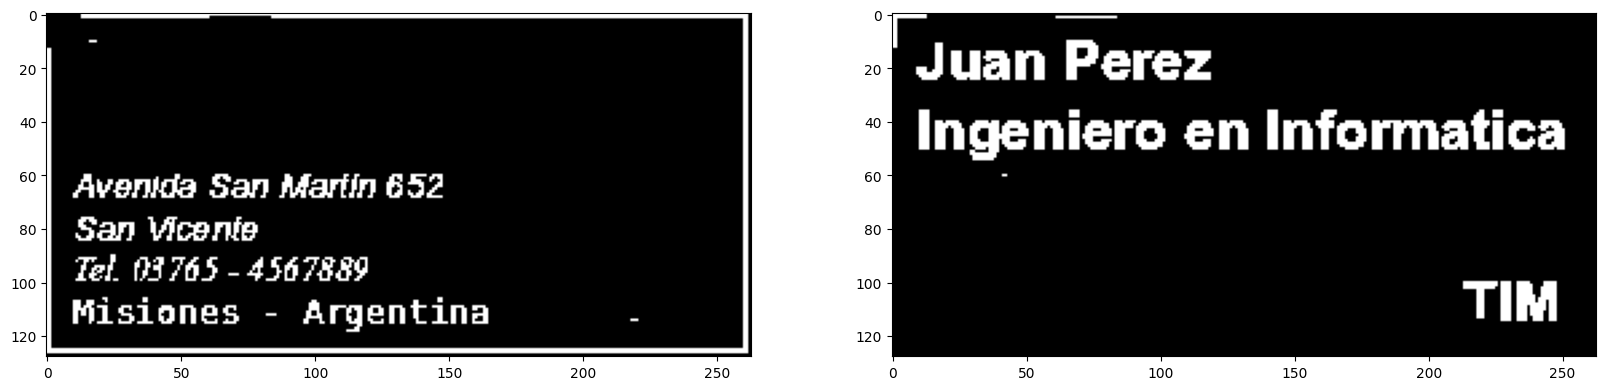

In [169]:
tarjeta = cv.imread("imagenes/Tarjeta.jpeg",cv.IMREAD_GRAYSCALE)
_,tarjeta = cv.threshold(tarjeta,200,255,cv.THRESH_BINARY_INV)


tarjeta_apertura = cv.morphologyEx(tarjeta,cv.MORPH_OPEN,cv.getStructuringElement(cv.MORPH_CROSS,(3,3)),iterations=2)
tarjeta_apertura = cv.morphologyEx(tarjeta_apertura,cv.MORPH_DILATE,cv.getStructuringElement(cv.MORPH_RECT,(6,7)),iterations=3)

mask = cv.bitwise_and(tarjeta,tarjeta,mask=tarjeta_apertura)
mask2 = cv.bitwise_and(tarjeta,tarjeta,mask=255-tarjeta_apertura)
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,20)) 
ax[0].imshow(mask2,cmap="gray")
ax[1].imshow(mask,cmap="gray")
plt.show()

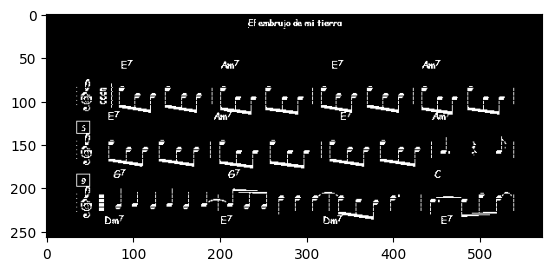

In [165]:
musica = cv.imread("imagenes/notas01.png",cv.IMREAD_GRAYSCALE)
_,musica = cv.threshold(musica,200,255,cv.THRESH_BINARY_INV)
# Aplicar el algoritmo connectedComponents
num_labels, labels = cv.connectedComponents(musica)

# Obtener las etiquetas únicas
unique_labels = np.unique(labels)

# Obtener cada componente por separado
components = []
for label in unique_labels:
    # Crear una máscara para el componente actual
    mask = np.uint8(labels == label)
    components.append(mask)
mask = cv.morphologyEx(musica,cv.MORPH_OPEN,cv.getStructuringElement(cv.MORPH_RECT,(40,1)),iterations=1)

musica = cv.bitwise_and(musica,musica,mask=255-mask)

plt.imshow(musica,cmap="gray")
plt.show()

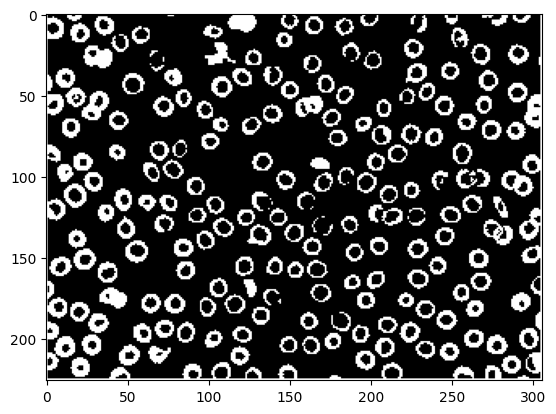

In [159]:
globulosog = cv.imread("imagenes/Globulos Rojos.jpg",cv.IMREAD_GRAYSCALE)
_,globulos = cv.threshold(globulosog,110,255,cv.THRESH_BINARY_INV)


plt.imshow(globulos,cmap="gray")
plt.show()

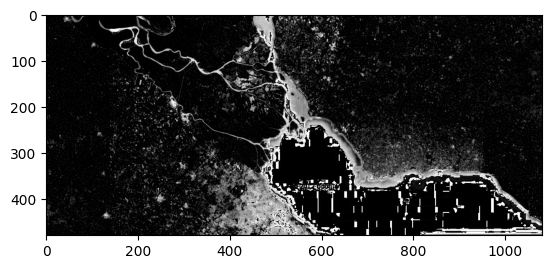

In [157]:
rio = cv.imread("imagenes/Rio.jpeg")

b,g,r = cv.split(rio)

result = np.where(b>200,b,0) 

kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
closed = cv.morphologyEx(result, cv.MORPH_CLOSE, kernel)

mask = b - cv.erode(closed,kernel)

result = cv.bitwise_and(rio,rio, mask=mask)

plt.imshow(mask,cmap="gray")
plt.show()

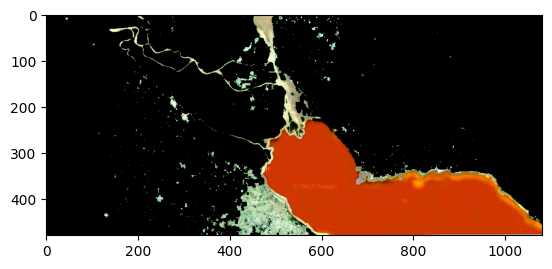

In [158]:
import cv2
import numpy as np

# Cargar la imagen
rio = cv2.imread('imagenes/Rio.jpeg')

b,g,r = cv.split(rio)
# Convertir la imagen a escala de grises
gray = b

# Aplicar un umbral para obtener una imagen binaria
_, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Aplicar una operación de cierre para unir regiones cercanas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

# Encontrar contornos en la imagen cerrada
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(rio)

# Dibujar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
result = cv2.bitwise_and(rio, mask)

# Mostrar la imagen original y el resultado
plt.imshow(result)
plt.show()


In [156]:
import ipywidgets as widgets
from ipywidgets import interact

 # rectangulos,elipses,cruces...


def iteraciones(i,thresh):
    img1 = cv.imread('imagenes/Cuerpos.jpg',0)
    _,img1 = cv.threshold(img1,thresh,255,cv.THRESH_BINARY)
    size = np.size(img1)
    skel = np.zeros(img1.shape,np.uint8)
    img=cv.bitwise_not(img1)

    element = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
    for k in range(i):
        eroded = cv.erode(img,element)
        temp = cv.dilate(eroded,element)
        temp = cv.subtract(img,temp)
        skel = cv.bitwise_or(skel,temp)
        img = eroded.copy()

    plt.figure(figsize=(50,50))
    plt.subplot(1,2,1)
    plt.imshow(img1,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(skel,cmap='gray')
    plt.show()

interact(iteraciones,thresh=widgets.IntSlider(min=1,max=255),i=widgets.IntSlider(min=1,max=255))




interactive(children=(IntSlider(value=1, description='i', max=255, min=1), IntSlider(value=1, description='thr…

<function __main__.iteraciones(i, thresh)>